<a href="https://colab.research.google.com/github/catafest/colab_google/blob/master/catafest_019.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*Google Maps explicitly forbid using map tiles offline* or caching them, but I think Microsoft Bing Maps don't say anything explicitly against it, and I guess you are not planning to use your program commercially (?)

In [ ]:
!pip install image


In [ ]:
import os
from PIL import Image
from matplotlib.pyplot import imshow, subplots, figure, gcf
import random
import urllib
from io import StringIO
import urllib.request
#from geofunctions import *

In [ ]:
class TileServer(object):
    def __init__(self):
        self.imagedict = {}
        self.mydict = {}
        self.layers = 'ROADMAP'
        self.path = './'
        self.urlTemplate = 'http://ecn.t{4}.tiles.virtualearth.net/tiles/{3}{5}?g=0'
        self.layerdict = {'SATELLITE': 'a', 'HYBRID': 'h', 'ROADMAP': 'r'}

    def tiletoquadkey(self, xi, yi, z, layers):
        quadKey = ''
        for i in range(z, 0, -1):
            digit = 0
            mask = 1 << (i - 1)
            if(xi & mask) != 0:
                digit += 1
            if(yi & mask) != 0:
                digit += 2
            quadKey += str(digit)
        return quadKey

    def loadimage(self, fullname, tilekey):
        im = Image.open(fullname)
        self.imagedict[tilekey] = im
        return self.imagedict[tilekey]

    def tile_as_image(self, xi, yi, zoom):
        tilekey = (xi, yi, zoom)
        result = None
        try:
            result = self.imagedict[tilekey]
            print(result)
        except:
            print(self.layers)
            filename = '{}_{}_{}_{}.jpg'.format(zoom, xi, yi, self.layerdict[self.layers])
            print("filename is " + filename)
            fullname = self.path + filename
            try:
                result = self.loadimage(fullname, tilekey)
            except:
                server = random.choice(range(1,4))
                quadkey = self.tiletoquadkey(*tilekey)
                print (quadkey)
                url = self.urlTemplate.format(xi, yi, zoom, self.layerdict[self.layers], server, quadkey)
                print ("Downloading tile %s to local cache." % filename)
                urllib.request.urlretrieve(url, fullname)
                #urllib.urlretrieve(url, fullname)
                result = self.loadimage(fullname, tilekey)
        return result


ROADMAP
filename is 2_2_5_r.jpg
ROADMAP
filename is 3_3_2_r.jpg
ROADMAP
filename is 3_1_2_r.jpg
ROADMAP
filename is 3_2_2_r.jpg


<Figure size 432x288 with 0 Axes>

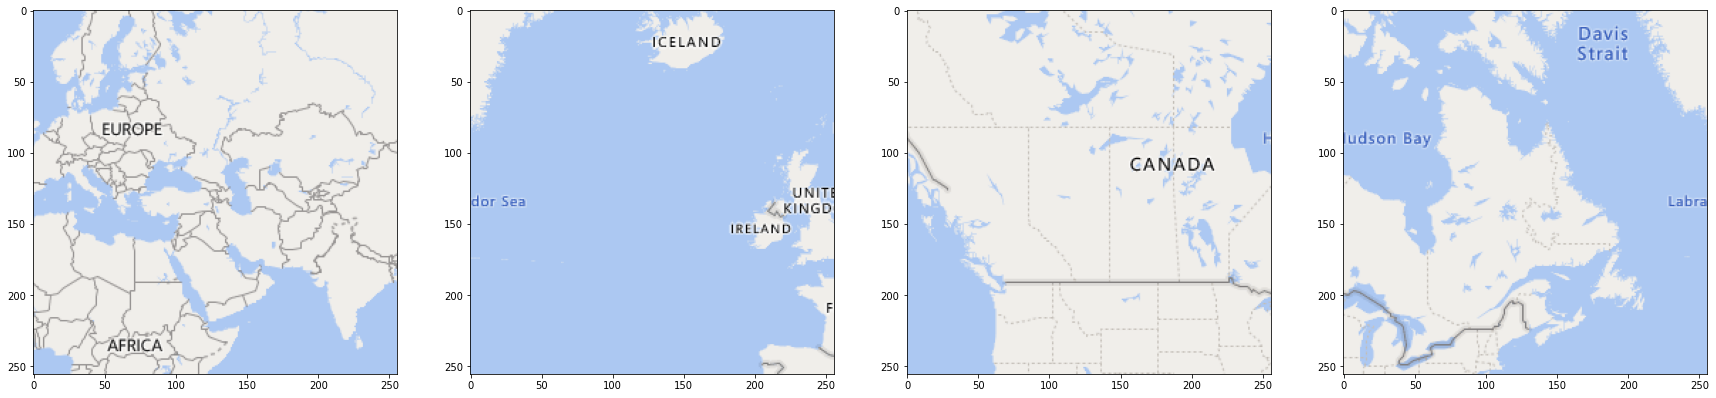

In [ ]:
if __name__ == "__main__":
    ts = TileServer()
    im0 = ts.tile_as_image(2, 5, 2)
    im1 = ts.tile_as_image(3, 2, 3)
    im2 = ts.tile_as_image(1, 2, 3)
    im3 = ts.tile_as_image(2, 2, 3)
    figure()
    f, axarr = subplots(1,4) 
    axarr[0].imshow(im0)
    axarr[1].imshow(im1)
    axarr[2].imshow(im2)
    axarr[3].imshow(im3)
    gcf().set_size_inches(30, 30)